## Tutorial Overview

In [1]:
# 1. Data set size Sensitivity Analysis
# 2. Synthetic Prediction Task and Baseline Model
# 3. Sensitivity Analysis of Dataset Size

In [2]:
# How Much Training Data is Required for Machine Learning ?

# There is a strong relationship between training dataset size and model performance.
# especially for nonlinear models. The relationship often involves an improvement 
# in performance to a point and a general reduction in the expected variance of the model 
#  as the datasize is increased

# Knowing this relationship for your Model and dataset can be helpful for a number of reasons,
# Such as
# Evaluate More Models.
# Find a better model
# Decide to gather more

In [3]:
# The make_classification() scikit-learn function can be used to create a synthetic classification dataset
# In this case we will use 20 input features (columns) and generate 1000 sample(rows)


# test classification dataset
from sklearn.datasets import make_classification

# define datasets
x,y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5,
                         random_state=1)
## Sumarize the dataset
print(x.shape, y.shape)

(1000, 20) (1000,)


In [1]:
# Evaluate a decision tree model on the synthetic classification dataset
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

# load dataset
x,y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5,
                         random_state=1)

# define model evaluation producure 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define the model
model = DecisionTreeClassifier()
# evaluate model
scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)

# repear performance 
print("Mean Accuracy : %.3f (%.3f)"%(scores.mean(), scores.std()))

Mean Accuracy : 0.820 (0.041)


In [2]:
# Running the example creates the dataset then estimates 
# the performance of the model on the problemusing the chosen test harness.

## Sensitivity Analysis of Dataset Size
**IT raises questions, such as.....**<br>

will the model perform better on more data ? <br>
Does the estimated performance hold on smaller or larger samples from the problem domain ? <br>
How sensitive is model performance to dataset size ? <br>
What is the relation ship of dataset size to model performance ? <br>

In [3]:
# load dataset
def load_dataset(n_samples):
    # define the dataset
    x, y = make_classification(n_samples = int(n_samples), n_features=20, n_informative=15,
                              n_redundant=5, random_state=1)
    return x, y

In [4]:
# We will define a function to evaluate a model on a loaded dataset.
# We define a function that takes a dataset and returns a summary of the performance
# This function is listed below, taking the input and output elements of a dataset and 
# returning the mean and standard deviation of the decision of the tree model on the dataset

# evaluate a model
def evaluate_model(x,y):
    # define model evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # define model
    model = DecisionTreeClassifier()
    
    # evaluate Model
    scores = cross_val_score(model, x,y, scoring="accuracy", cv = cv, n_jobs = -1)
    # Return summaruy stats
    return[scores.mean(), scores.std()]

In [6]:
# We can define a range of different range of different dataset sizes to evaluate.
# 
sizes = [50, 100, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000]

In [10]:
# Evaluate each Number of Samples
means, stds = list(), list()
for n_samples in sizes:
    # get a data set
    x,y = load_dataset(n_samples)
    # Evaluate Model on this dataset size
    mean, std = evaluate_model(x,y)
    # Store 
    means.append(mean)
    stds.append(std)

In [11]:
means[:10]

[0.6666666666666667,
 0.7133333333333334,
 0.804,
 0.8173333333333332,
 0.8355333333333335,
 0.8665999999999999,
 0.8997866666666668,
 0.9115633333333335,
 0.9382013333333332,
 0.935565]

In [12]:
stds[:10]

[0.16599866130651644,
 0.11469767022723504,
 0.055952360688952756,
 0.046183210032314646,
 0.01570293673878304,
 0.009064950818031693,
 0.004786350964519371,
 0.0027309929004342287,
 0.0008760355142471204,
 0.0008565774921161528]

In [13]:
# Next we can summarize the relationship betweeen the dataset size and model performance.

# We will use the Standard deviation as a measure of uncertainty on the estimated model performance.
# This can be achieved by multiplying the value by 2 to cover approximately 95% of the expected performance if the
# performance follows a normal distribution

In [15]:
from matplotlib import pyplot

<ErrorbarContainer object of 3 artists>

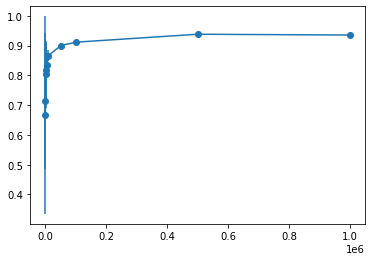

In [16]:
# This can be shown on the plot as an error bar around the mean expected performance for dataset size

# define error bar as 2 standard deviations from the mean or 95%
err = [min(1, s*2) for s in stds]

# Plot dataset size Vs mean performance with error bars
pyplot.errorbar(sizes, means, yerr = err, fmt = '-o')

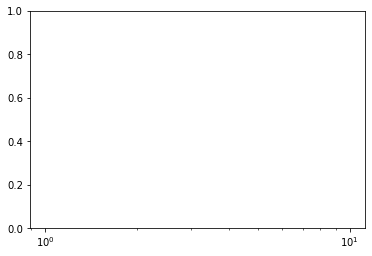

In [17]:
# To make the above plot more readable ,
# We can change the scale of the x-axis to log, 
# given that our dataset sizes are on a rough log 10 scale

# Change the scale of the x-axis to log
ax = pyplot.gca()
ax.set_xscale("log", nonpositive = "clip")
pyplot.show()

## Trying all above process in a single code

In [18]:
# Sensitivity analysis of model performance to dataset size
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [ ]:
# load Datasets
def load_dataset(n_samples):
    # Define the model evaluation procedure
    cv = make_classification(n_samples=int(n_samples), n_features = 20, n_informative = 15,\
                                n_redundant = 5,random_state = 1)
    return x,y

# Evaluate a Model
def evaluate_model(x,y):
    # Define model evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # Define Model
    model = DecisionTreeClassifier()
    # Evaluate Model
    scores = cross_val_score(model, x, y, scoring = "accuracy", cv = cv, n_jobs=-1)
    # Return summary stats
    return [scores.mean(), scores.std()]

# Define number of samples to consider
sizes = [50, 100, 500, 1000, 50000, 100000, 500000, 1000000]

# Evaluate each number fo samples
means, stds = list(), list() # Blank lists

for n_samples in sizes:
    # get a dataset
    x,y = load_dataset(n_samples)
    # Evaluate a model on this dataset size
    mean, std = evaluate_model(x,y)
    # Store mean, std 
    means.append(mean)
    stds.append(std)
    
    # Summarize performance 
    print("> %d : %.3f (%.3f)"%(n_samples, mean, std))
# define error bar as 2 standard deviations from the mean or 95 %
err = [min(1, s*2) for s in stds]
# plot dataset size Vs mean performance with error bars
pyplot.errorbar(sizes, means, yerr=yerr, fmt = '-o')
# Change the scale of the x-axis to log
ax = plt.gca()
ax.set_xscale("log", nonpositive = "clip")
# show the plot
plt.show()

### Final Conclusion

In [ ]:
# - Our Result may vary given the stochastic nature of the algorithm
#    or evaluation procedure, or differences in numerical precision

# In This case, we can see the expected trend of increasing mean model performance with dataset
# size and decreasing model variance measured using the standard deviation of classification.

In [ ]:
# Use Ful Further Reading

# How Much training data is required ?
# https://machinelearningmastery.com/much-training-data-required-machine-learning/

